In [1]:
import os
import h5py
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from ipywidgets import interact

data_root = "../mri_example/data"
mat_list = os.listdir(data_root)

In [2]:
def load_mat(filepath, img_size):
    mat = h5py.File(filepath, "r")
    label = mat['cjdata']['label'].__array__()
    img = mat['cjdata']['image'].__array__()
    img = cv.resize(img, (img_size, img_size))
    img = img/img.max()
    mask = mat['cjdata']['tumorMask'].__array__()
    mat.close()
    return img, label, mask

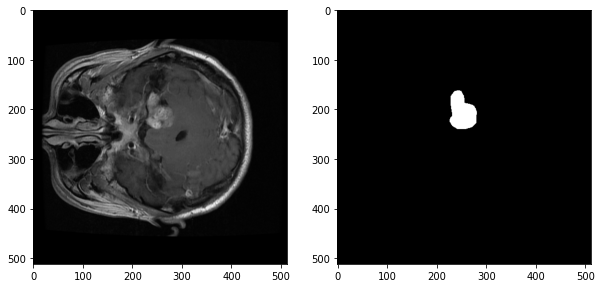

In [3]:
img, label, mask = load_mat(os.path.join(data_root, mat_list[0]))
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.show()

In [4]:
from torch.utils.data import Dataset, DataLoader

In [19]:
class MriDataset(Dataset):
    
    def __init__(self, root_dir):
        self.dir = root_dir
        self.file_list = [file for file in os.listdir(root_dir) if file.split(".")[-1] == "mat"]

    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img, label, mask = load_mat(os.path.join(self.dir, self.file_list[idx]))
        return img[np.newaxis], label[0], mask

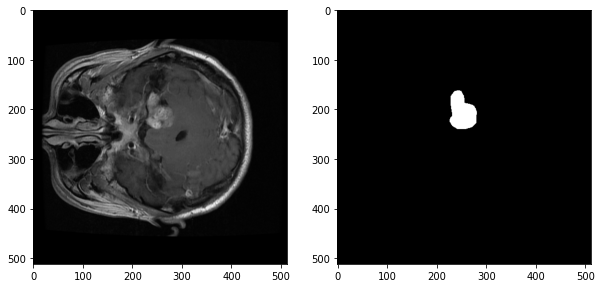

Label: [1.]


In [20]:
mridataset = MriDataset(data_root)

for img, label, mask in mridataset:
    break

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img[0], cmap='gray')
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.show()

print(f"Label: {label}")

In [21]:
loader = DataLoader(mridataset, batch_size=16)
for img, label, mask in loader:
    break
print(f"Image tensor's shape: {img.shape}")
print(f"Label tensor's shape: {label.shape}")
print(f"Mask tensor's shape: {mask.shape}")

Image tensor's shape: torch.Size([16, 1, 512, 512])
Label tensor's shape: torch.Size([16, 1])
Mask tensor's shape: torch.Size([16, 512, 512])
